# Examples

This notebook contains several examples that use the *deltares-coastal-structures-toolbox*. These examples revolve around the same basic coastal structure, defined below. To do so, first we need to import some Python packages.

In [25]:
import matplotlib.pyplot as plt
import numpy as np

import deltares_coastal_structures_toolbox.functions.core_physics as core_physics
import deltares_coastal_structures_toolbox.functions.hydraulic.wave_overtopping.eurotop2018 as wave_overtopping_eurotop2018
import deltares_coastal_structures_toolbox.functions.hydraulic.wave_overtopping.taw2002 as wave_overtopping_taw2002
import deltares_coastal_structures_toolbox.functions.structural.forces_crestwall.vangentvanderwerf2019 as vangentvanderwerf2019
import deltares_coastal_structures_toolbox.functions.structural.stability_concrete_armour.accropode2_hudson1959 as accropode2_hudson1959
import deltares_coastal_structures_toolbox.functions.structural.stability_concrete_armour.accropode_hudson1959 as accropode_hudson1959
import deltares_coastal_structures_toolbox.functions.structural.stability_concrete_armour.core_loc_hudson1959 as core_loc_hudson1959
import deltares_coastal_structures_toolbox.functions.structural.stability_concrete_armour.cubes_double_layer_hudson1959 as cubes_double_layer_hudson1959
import deltares_coastal_structures_toolbox.functions.structural.stability_concrete_armour.cubes_single_layer_vangent2002 as cubes_single_layer_vangent2002
import deltares_coastal_structures_toolbox.functions.structural.stability_concrete_armour.cubipod_hudson1959 as cubipod_hudson1959
import deltares_coastal_structures_toolbox.functions.structural.stability_concrete_armour.tetrapod_hudson1959 as tetrapod_hudson1959
import deltares_coastal_structures_toolbox.functions.structural.stability_rock_armour.etemadshahidi2020 as etemadshahidi2020
import deltares_coastal_structures_toolbox.functions.structural.stability_rock_armour.scaravaglione2025 as scaravaglione2025
import deltares_coastal_structures_toolbox.functions.structural.stability_rock_armour.vandermeer1988 as vandermeer1988
import deltares_coastal_structures_toolbox.functions.structural.stability_rock_armour.vandermeer1988_modified as vandermeer1988_modified
import deltares_coastal_structures_toolbox.functions.structural.stability_rock_armour.vandermeer2021 as vandermeer2021

Example structure - Rubble-Mound Breakwater

In [26]:
cot_alpha = 2.5
B_berm = 3.0
db = 0.5
Rc_var = np.linspace(2.0, 6.0, 1000)
q_max = 10e-3

Example wave load

In [27]:
Hm0 = 2.0
Tmm10 = 5.0
Tp = 1.1 * Tmm10
beta = 30.0
rho_water = 1025.0

## Wave overtopping

Below two different wave overtopping formulas, TAW (2002) and EurOtop (2018), are applied to our structure. 

In [28]:
Rc_taw2002, _ = wave_overtopping_taw2002.calculate_crest_freeboard_Rc(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    q=q_max,
    cot_alpha=cot_alpha,
    B_berm=B_berm,
    db=db,
)
Rc_eurotop2018, _ = wave_overtopping_eurotop2018.calculate_crest_freeboard_Rc(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    q=q_max,
    cot_alpha=cot_alpha,
    B_berm=B_berm,
    db=db,
)

print(f"Required freeboard for our structure {Rc_taw2002:.2f} m following TAW (2002)")
print(
    f"Required freeboard for our structure {Rc_eurotop2018:.2f} m following EurOtop (2018)"
)

Required freeboard for our structure 2.80 m following TAW (2002)
Required freeboard for our structure 2.83 m following EurOtop (2018)


Clearly there are small differences between the two formulas. To gain more insight into those differences, let's calculate the mean wave overtopping discharge for a range of different crest freeboard heights (Rc) and plot them.

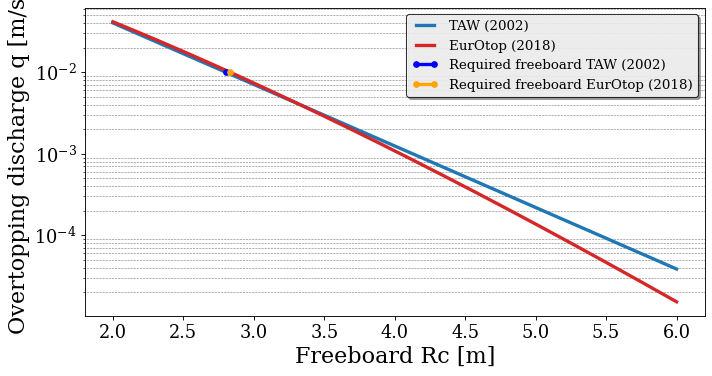

In [29]:
q_taw2002, _ = wave_overtopping_taw2002.calculate_overtopping_discharge_q(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    Rc=Rc_var,
    cot_alpha=cot_alpha,
    B_berm=B_berm,
    db=db,
)
q_eurotop2018, _ = wave_overtopping_eurotop2018.calculate_overtopping_discharge_q(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    Rc=Rc_var,
    cot_alpha=cot_alpha,
    B_berm=B_berm,
    db=db,
)

plt.figure(figsize=(10, 5))
plt.plot(Rc_var, q_taw2002, label="TAW (2002)")
plt.plot(Rc_var, q_eurotop2018, label="EurOtop (2018)")
plt.plot(
    Rc_taw2002,
    q_max,
    label="Required freeboard TAW (2002)",
    marker="o",
    markersize=5,
    color="blue",
)
plt.plot(
    Rc_eurotop2018,
    q_max,
    label="Required freeboard EurOtop (2018)",
    marker="o",
    markersize=5,
    color="orange",
)
plt.yscale("log")
plt.xlabel("Freeboard Rc [m]")
plt.ylabel("Overtopping discharge q [m/s]")
plt.grid(which="both")
plt.legend()

## Stability - Rock Armour

Below are different formulas to calculate the required stone diameter and mass if we decided to use rock armour on our structure.

In [30]:
S = 9.0
rho_armour = 2650.0
rho_core = 2650.0
P = 0.4
N_waves = 3000
H2p = 1.4 * Hm0
Tm = 0.915 * Tmm10
M50_core = 40

Dn50_vdm1988 = vandermeer1988.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    H2p=H2p,
    Tm=Tm,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    P=P,
    rho_armour=rho_armour,
    S=S,
)

M50_vdm1988 = core_physics.calculate_M50_from_Dn50(Dn50_vdm1988, rho_rock=rho_armour)

Dn50_vdm1988_mod = vandermeer1988_modified.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    H2p=H2p,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    P=P,
    rho_armour=rho_armour,
    S=S,
)

M50_vdm1988_mod = core_physics.calculate_M50_from_Dn50(
    Dn50_vdm1988_mod, rho_rock=rho_armour
)

Dn50_es2020 = etemadshahidi2020.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    rho_armour=rho_armour,
    S=S,
    M50_core=M50_core,
)

M50_es2020 = core_physics.calculate_M50_from_Dn50(Dn50_es2020, rho_rock=rho_armour)

Dn50_vdm2021 = vandermeer2021.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    P=P,
    rho_armour=rho_armour,
    S=S,
)

M50_vdm2021 = core_physics.calculate_M50_from_Dn50(Dn50_vdm2021, rho_rock=rho_armour)

Dn50_svl2025 = scaravaglione2025.calculate_nominal_rock_diameter_Dn50(
    Hm0=Hm0,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    rho_armour=rho_armour,
    rho_core=rho_core,
    S=S,
    M50_core=M50_core,
)

M50_svl2025 = core_physics.calculate_M50_from_Dn50(Dn50_svl2025, rho_rock=rho_armour)

print(
    f"Required Dn50 & M50 for rock armour {Dn50_vdm1988:.2f} m & {M50_vdm1988:.0f} kg following Van der Meer (1988)"
)
print(
    f"Required Dn50 & M50 for rock armour {Dn50_vdm1988_mod:.2f} m & {M50_vdm1988_mod:.0f} kg following Modified Van der Meer (Van Gent, 2003)"
)
print(
    f"Required Dn50 & M50 for rock armour {Dn50_es2020:.2f} m & {M50_es2020:.0f} kg following Etemad-Shahidi et al. (2020)"
)
print(
    f"Required Dn50 & M50 for rock armour {Dn50_vdm2021:.2f} m & {M50_vdm2021:.0f} kg following Van der Meer (2021)"
)
print(
    f"Required Dn50 & M50 for rock armour {Dn50_svl2025:.2f} m & {M50_svl2025:.0f} kg following Scaravaglione et al. (2025) for shallow water conditions"
)

Required Dn50 & M50 for rock armour 0.44 m & 221 kg following Van der Meer (1988)
Required Dn50 & M50 for rock armour 0.47 m & 280 kg following Modified Van der Meer (Van Gent, 2003)
Required Dn50 & M50 for rock armour 0.42 m & 191 kg following Etemad-Shahidi et al. (2020)
Required Dn50 & M50 for rock armour 0.44 m & 222 kg following Van der Meer (2021)
Required Dn50 & M50 for rock armour 0.22 m & 28 kg following Scaravaglione et al. (2025) for shallow water conditions


D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_physics.py:239: UserWarning: rho_armour is not provided, the default value of 2650 kg/m3 is used.
  warnings.warn(
D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Ratio H2%/Hs (1.0) is outside of the validity range (1.2 - 1.4) for the Modified Van der Meer (Van Gent et al., 2003) formula.
  warnings.warn(
D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Stability number Ns (5.737752759812155) is outside of the validity range (1.47 - 3.44) for the Scaravaglione et al. (2025) formula.
  warnings.warn(
D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Wave steepness s_m-1,0 (0.05123902391176013) is outside of the validity range (0.02 - 0.049) for the 

Below, the different behaviour of both formulas for different S values is shown.

D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Stability number Ns (3.4414425641287707) is outside of the validity range (1.47 - 3.44) for the Scaravaglione et al. (2025) formula.
  warnings.warn(
D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Stability number Ns (3.445457412412867) is outside of the validity range (1.47 - 3.44) for the Scaravaglione et al. (2025) formula.
  warnings.warn(
D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Stability number Ns (3.4494648724576145) is outside of the validity range (1.47 - 3.44) for the Scaravaglione et al. (2025) formula.
  warnings.warn(
D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Stability number Ns (3.

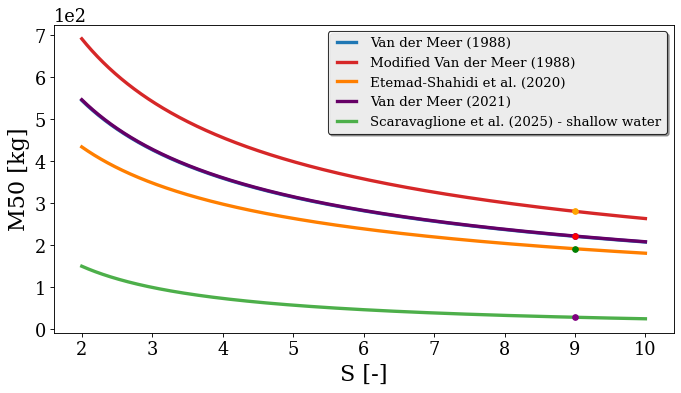

In [31]:
S_var = np.linspace(2.0, 10.0, 1000)

Dn50_vdm1988_var = vandermeer1988.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    H2p=H2p,
    Tm=Tm,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    P=P,
    rho_armour=rho_armour,
    S=S_var,
)

M50_vdm1988_var = core_physics.calculate_M50_from_Dn50(
    Dn50_vdm1988_var, rho_rock=rho_armour
)

Dn50_vdm1988_mod_var = vandermeer1988_modified.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    H2p=H2p,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    P=P,
    rho_armour=rho_armour,
    S=S_var,
)

M50_vdm1988_mod_var = core_physics.calculate_M50_from_Dn50(
    Dn50_vdm1988_mod_var, rho_rock=rho_armour
)

Dn50_es2020_var = etemadshahidi2020.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    rho_armour=rho_armour,
    S=S_var,
    M50_core=M50_core,
)

M50_es2020_var = core_physics.calculate_M50_from_Dn50(
    Dn50_es2020_var, rho_rock=rho_armour
)

Dn50_vdm2021_var = vandermeer2021.calculate_nominal_rock_diameter_Dn50(
    Hs=Hm0,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    P=P,
    rho_armour=rho_armour,
    S=S_var,
)

M50_vdm2021_var = core_physics.calculate_M50_from_Dn50(
    Dn50_vdm2021_var, rho_rock=rho_armour
)

Dn50_svl2025_var = scaravaglione2025.calculate_nominal_rock_diameter_Dn50(
    Hm0=Hm0,
    Tmm10=Tmm10,
    N_waves=N_waves,
    cot_alpha=cot_alpha,
    rho_armour=rho_armour,
    rho_core=rho_core,
    S=S_var,
    M50_core=M50_core,
)

M50_svl2025_var = core_physics.calculate_M50_from_Dn50(
    Dn50_svl2025_var, rho_rock=rho_armour
)

plt.figure(figsize=(10, 5))
plt.plot(S_var, M50_vdm1988_var, label="Van der Meer (1988)")
plt.plot(S_var, M50_vdm1988_mod_var, label="Modified Van der Meer (1988)")
plt.plot(S_var, M50_es2020_var, label="Etemad-Shahidi et al. (2020)")
plt.plot(S_var, M50_vdm2021_var, label="Van der Meer (2021)")
plt.plot(S_var, M50_svl2025_var, label="Scaravaglione et al. (2025) - shallow water")
plt.plot(
    S,
    M50_vdm1988,
    marker="o",
    markersize=5,
    color="blue",
)
plt.plot(
    S,
    M50_vdm1988_mod,
    marker="o",
    markersize=5,
    color="orange",
)
plt.plot(
    S,
    M50_es2020,
    marker="o",
    markersize=5,
    color="green",
)
plt.plot(
    S,
    M50_vdm2021,
    marker="o",
    markersize=5,
    color="red",
)
plt.plot(
    S,
    M50_svl2025,
    marker="o",
    markersize=5,
    color="purple",
)
plt.xlabel("S [-]")
plt.ylabel("M50 [kg]")
plt.grid(which="both")
plt.legend()

## Stability - Concrete Armour Units

D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Cotangent of the front-side slope of the structure (2.5) is outside of the validity range (1.33 - 1.5) for the Accropodes Hudson 1959 formula.
  warnings.warn(
D:\checkouts\git\coastal-structures-toolbox\deltares_coastal_structures_toolbox\functions\core_utility.py:44: UserWarning: Value of Cotangent of the front-side slope of the structure (2.5) is outside of the validity range (1.33 - 1.5) for the Accropode II Hudson 1959 formula.
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Cubipod'),
  Text(1, 0, 'Tetrapod'),
  Text(2, 0, 'Cubes single'),
  Text(3, 0, 'Cubes double'),
  Text(4, 0, 'Core-loc'),
  Text(5, 0, 'Accropode'),
  Text(6, 0, 'Accropode2')])

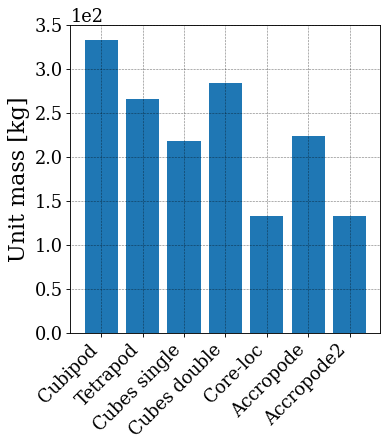

In [32]:
M_cubipod = cubipod_hudson1959.calculate_unit_mass_M(
    Hs=Hm0, rho_armour=rho_armour, rho_water=rho_water, KD=12.0
)
M_tetrapod = tetrapod_hudson1959.calculate_unit_mass_M(
    Hs=Hm0, rho_armour=rho_armour, rho_water=rho_water, KD=8.0, cot_alpha=cot_alpha
)
M_cubes_single = cubes_single_layer_vangent2002.calculate_unit_mass_M_start_of_damage(
    Hs=Hm0, rho_armour=rho_armour, rho_water=rho_water
)
M_cubes_double = cubes_double_layer_hudson1959.calculate_unit_mass_M(
    Hs=Hm0, rho_armour=rho_armour, rho_water=rho_water, KD=7.5, cot_alpha=cot_alpha
)
M_core_loc = core_loc_hudson1959.calculate_unit_mass_M(
    Hs=Hm0, rho_water=rho_water, rho_armour=rho_armour, KD=16.0, cot_alpha=cot_alpha
)
M_accropode = accropode_hudson1959.calculate_unit_mass_M(
    Hs=Hm0, rho_armour=rho_armour, rho_water=rho_water, KD=9.5, cot_alpha=cot_alpha
)
M_accropode2 = accropode2_hudson1959.calculate_unit_mass_M(
    Hs=Hm0, rho_armour=rho_armour, rho_water=rho_water, KD=16, cot_alpha=cot_alpha
)

plt.bar(
    [
        "Cubipod",
        "Tetrapod",
        "Cubes single",
        "Cubes double",
        "Core-loc",
        "Accropode",
        "Accropode2",
    ],
    [
        M_cubipod,
        M_tetrapod,
        M_cubes_single,
        M_cubes_double,
        M_core_loc,
        M_accropode,
        M_accropode2,
    ],
)
plt.ylabel("Unit mass [kg]")
plt.xticks(rotation=45, ha="right")

## Forces - Crest Wall

In [ ]:
Rc = 3.0
Ac = 2.0
Hwall = 3.5
Bwall = 1.0
Fb = 0.8

FH2p = vangentvanderwerf2019.calculate_FH2p_oblique(
    Hm0=Hm0, 
    Tmm10=Tmm10, 
    beta=beta, 
    cot_alpha=cot_alpha, 
    Ac=Ac, 
    Rc=Rc, 
    Hwall=Hwall
    )
FV2p = vangentvanderwerf2019.calculate_FV2p_oblique(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    cot_alpha=cot_alpha,
    Ac=Ac,
    Bwall=Bwall,
    Fb=Fb
    )

FV2p 

np.float64(381.8507553688522)